# Project using keras and backend as tensorflow
# Identify hand written digits by using data of MNIST

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential,load_model
from keras.datasets import mnist
from keras.layers.core import Activation,Dense,Dropout

 

In [3]:
mnist.load_data?

In [4]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [5]:
len(X_train),len(X_test),len(y_train),len(y_test)

(60000, 10000, 60000, 10000)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_test.ndim

1

In [8]:
X_train.ndim

3

In [42]:
plt.imshow?

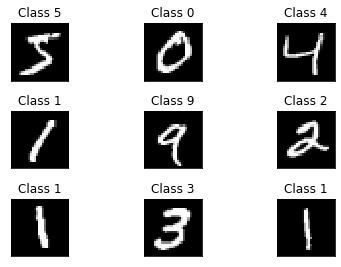

In [10]:
# Observe first 9 images of train data set
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])    
plt.show()    

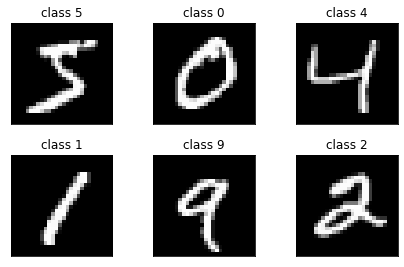

In [11]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i],cmap="gray",interpolation="none")
    plt.title("class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [12]:
plt.tight_layout?

## change the data from 3D to 2D

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
n_samples_train=X_train.shape[0]
n_samples_train

60000

In [15]:
n_features_train=X_train.shape[1] *  X_train.shape[2]
n_features_train

784

In [16]:
n_samples_train=X_train.shape[0]
print(f"the number of traing samples are: {n_samples_train}")
n_features_train=X_train.shape[1] * X_train.shape[2]
print(f"the number of traing features are: {n_features_train}")

n_samples_test=X_test.shape[0]
print(f"the number of testing samples are: {n_samples_test}")
n_features_test=X_test.shape[1] * X_test.shape[2]
print(f"the number of testing features are: {n_features_test}")

the number of traing samples are: 60000
the number of traing features are: 784
the number of testing samples are: 10000
the number of testing features are: 784


In [17]:
print("The number of traing samples are {}".format(n_samples_train))

The number of traing samples are 60000


In [18]:
X_train=X_train.reshape(n_samples_train,n_features_train)

In [19]:
X_train.shape

(60000, 784)

In [20]:
X_test=X_test.reshape(n_samples_test,n_features_test)

In [21]:
X_test.shape

(10000, 784)

In [22]:
y_train[0]

5

In [23]:
y_test.ndim

1

In [24]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
plt.hist?

In [ ]:
plt.hist?

In [ ]:
X_train=X_train / 255
X_test=X_test / 255

In [ ]:
X_train[0]

In [ ]:
print("Train matrix shape:",X_train.shape)
print("Test matrix shape:",X_test.shape)

## convert data into catageriocal values

In [ ]:
y_train[0]

In [ ]:
print(np.unique(y_train,return_counts=True
               ))

In [ ]:
np_utils.to_categorical?

In [27]:
num_classes=10
print("Before one hot encoding:",y_train.shape)
y_train_hot=np_utils.to_categorical(y_train,num_classes)
y_test_hot=np_utils.to_categorical(y_test,num_classes)
print("after one hot encoding:",y_train_hot.shape)

Before one hot encoding: (60000,)
after one hot encoding: (60000, 10)


In [28]:
y_train_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## build the network

In [29]:
n_cols=X_train.shape[1]

n_cols



784

In [30]:
model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(n_cols,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
                

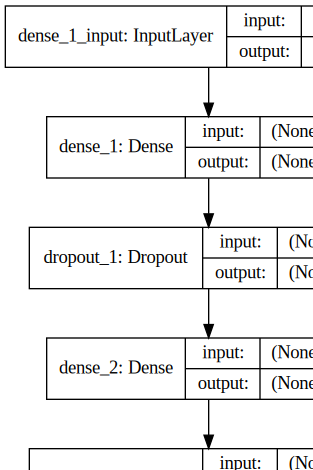

In [31]:

from IPython.display import SVG



from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True, show_layer_names=True,).create(prog='dot',format='svg'))

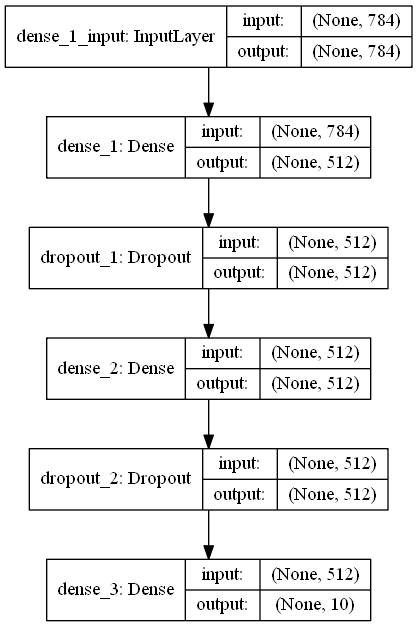

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
import pydot

In [36]:
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer='adam')
#We can start the training the model
# training the model and saving metrics in history
my_model = model.fit(X_train, y_train_hot,
          batch_size=128, epochs=4,
          #verbose=2,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 14s 234us/step - loss: 0.1733 - accuracy: 0.9603 - val_loss: 0.1386 - val_accuracy: 0.9679
Epoch 2/4
60000/60000 [==============================] - 12s 201us/step - loss: 0.1600 - accuracy: 0.9617 - val_loss: 0.1486 - val_accuracy: 0.9680
Epoch 3/4
60000/60000 [==============================] - 14s 226us/step - loss: 0.1395 - accuracy: 0.9646 - val_loss: 0.1162 - val_accuracy: 0.9743
Epoch 4/4
60000/60000 [==============================] - 12s 206us/step - loss: 0.1293 - accuracy: 0.9677 - val_loss: 0.1385 - val_accuracy: 0.9718


## save the model

In [37]:
import os
os.getcwd()

'C:\\Users\\jaiveer.karra.1'

In [38]:
save_dir="C:\\Users\\jaiveer.karra.1\\Desktop\\keras"
model_name="keras_mnist.h5"
model_path=os.path.join(save_dir,model_name)
model_path

'C:\\Users\\jaiveer.karra.1\\Desktop\\keras\\keras_mnist.h5'

In [39]:
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\jaiveer.karra.1\Desktop\keras\keras_mnist.h5 


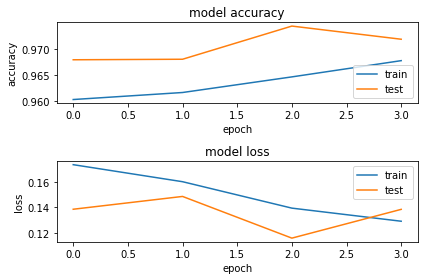

In [40]:
plt.subplot(2,1,1)
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
plot?

In [ ]:
os.getcwd()

In [41]:
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, y_test_hot, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])
#it is nothin but epoch 10values: val_loss: 0.0653 - val_acc: 0.9819

Test Loss 0.13852669462790543
Test Accuracy 0.9718000292778015


In [ ]:
mnist_model.evaluate?

In [ ]:
loss_and_metrics?